# Importing Libraries

In [418]:
import pandas as pd # for handling dataset
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [419]:
# reading data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\Second\abalone.csv') 

In [420]:
df.head() # to display data from top 5 only 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Dataset Description

Name                       Data Type            Measurement Unit                Description
-----                     ----------              -----------                     -------

Sex                        Nominal                    --                   M (male) / F (female) / I (infant)

Length                    continuous                  mm                     Longest shell measurement

Diameter                  continuous                  mm                      perpendicular to length

Height                    continuous                  mm                       with meat in shell

Whole weight              continuous                grams                        whole abalone

Shucked weight            continuous                grams                        weight of meat

Viscera weight            continuous                grams                  gut weight (after bleeding)

Shell weight              continuous                grams                        after being dried
 
Rings                      integer                    --                   +1.5 gives the age in years. 


In [421]:
# let's first compute the target variable of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [422]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [423]:
df.shape # to display total no of rows & columns

(4177, 9)

In [424]:
df.columns # to display all columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [425]:
df.isnull().sum() # Checking null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

### no null values found

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [427]:
df.describe() # to get high level idea of dataset

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


<AxesSubplot:xlabel='Sex', ylabel='count'>

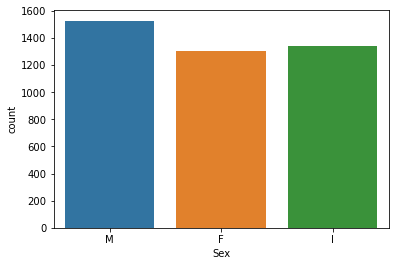

In [428]:
sns.countplot(df['Sex'])  # to visualize 

In [429]:
df.Sex.value_counts() # to count 

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [430]:
# converting column 'Sex' into binary codes
dummies=pd.get_dummies(df['Sex'])
df=pd.concat([df,dummies],axis=1)
df=df.drop('Sex',axis=1)

In [431]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [432]:
last_column = df.pop('age')

In [433]:
df.insert(10, 'age', last_column)  # inserting age at the last column 

In [434]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5


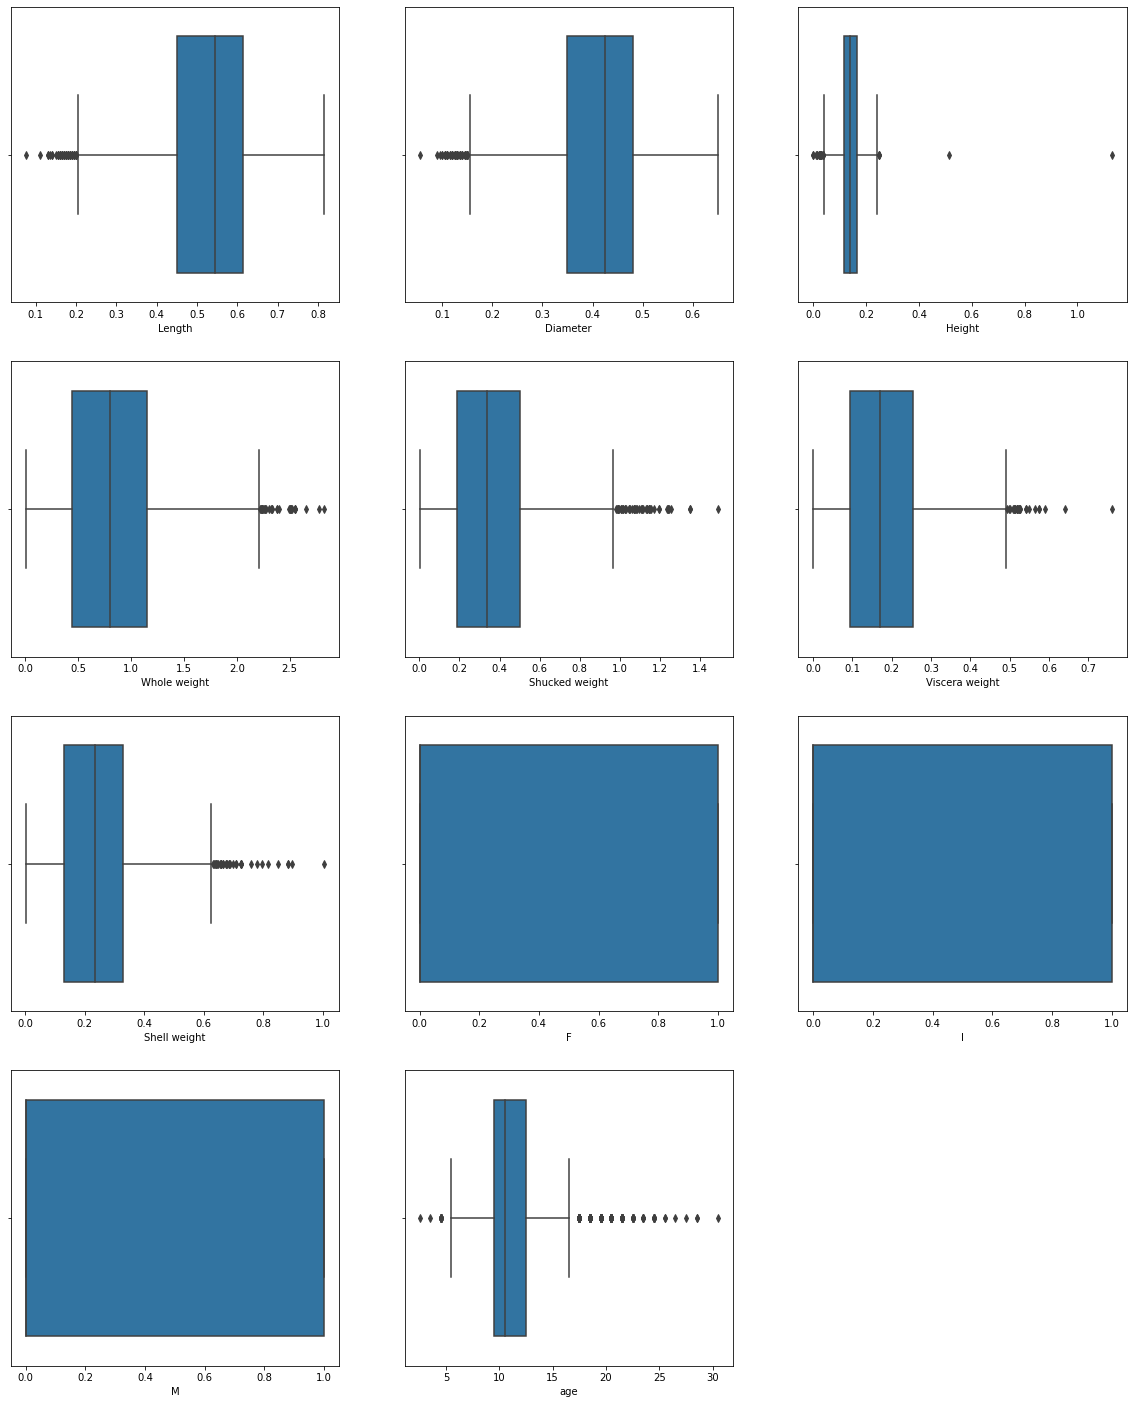

In [435]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Length
-0.6396434615451078


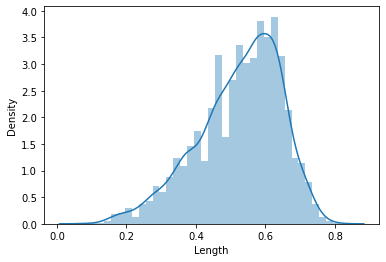

Diameter
-0.6089793517180232


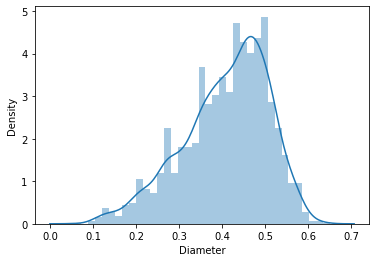

Height
3.127693679207538


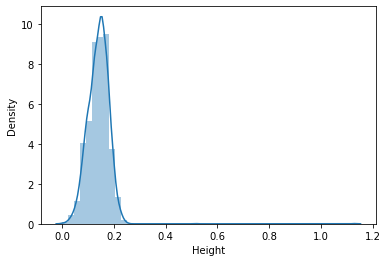

Whole weight
0.5307678720133928


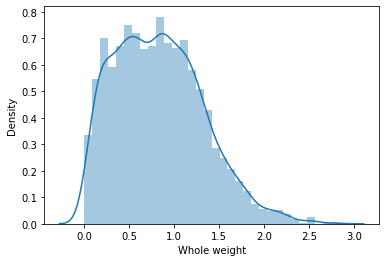

Shucked weight
0.7188396611678955


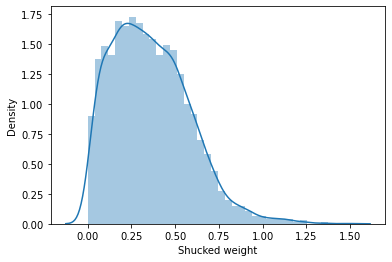

Viscera weight
0.5916395905344529


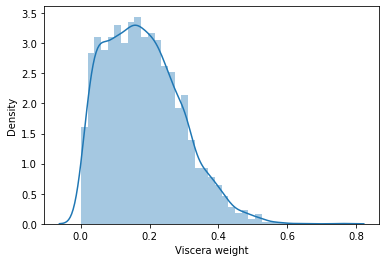

Shell weight
0.6207038222275745


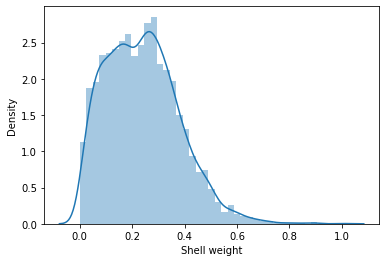

F
0.8070124520614567


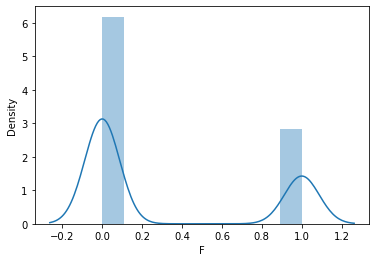

I
0.7654327113561394


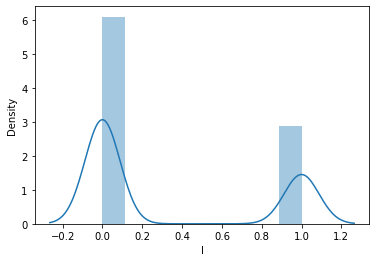

M
0.5571895418159807


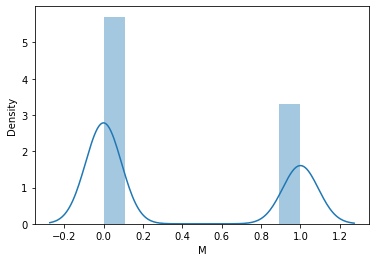

age
1.1137017739656028


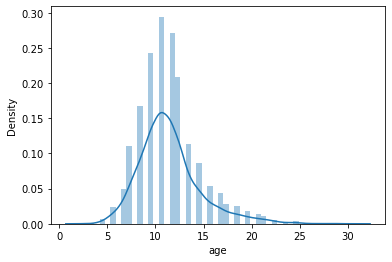

In [436]:
# to visualize skewness for every column
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

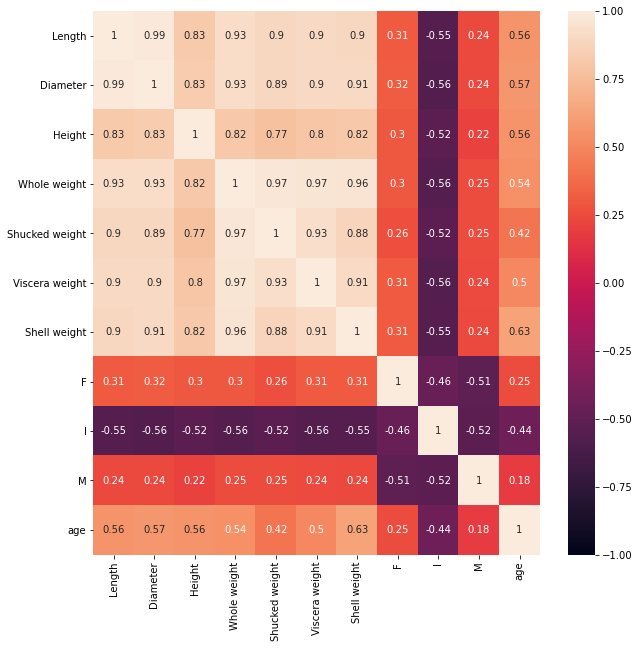

In [437]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Age is least correlated with shucked weight as one can see from the heatmap plot
#### whole weight is varying linearly with all features except age

## Removing skewness

In [494]:
q = df['Height'].quantile(0.90)
# removing the top 10% data from the height column
df= df[df['Height']<q]
q = df['Whole weight'].quantile(0.98)
# removing the top 2% data from the Whole weight column
df= df[df['Whole weight']<q]
q = df['Viscera weight'].quantile(0.97)
# removing the top 3% data from the Viscera weight column
df= df[df['Viscera weight']<q]
q = df['Shell weight'].quantile(0.96)
# removing the top 4% data from the Shell weight column
df= df[df['Shell weight']<q]

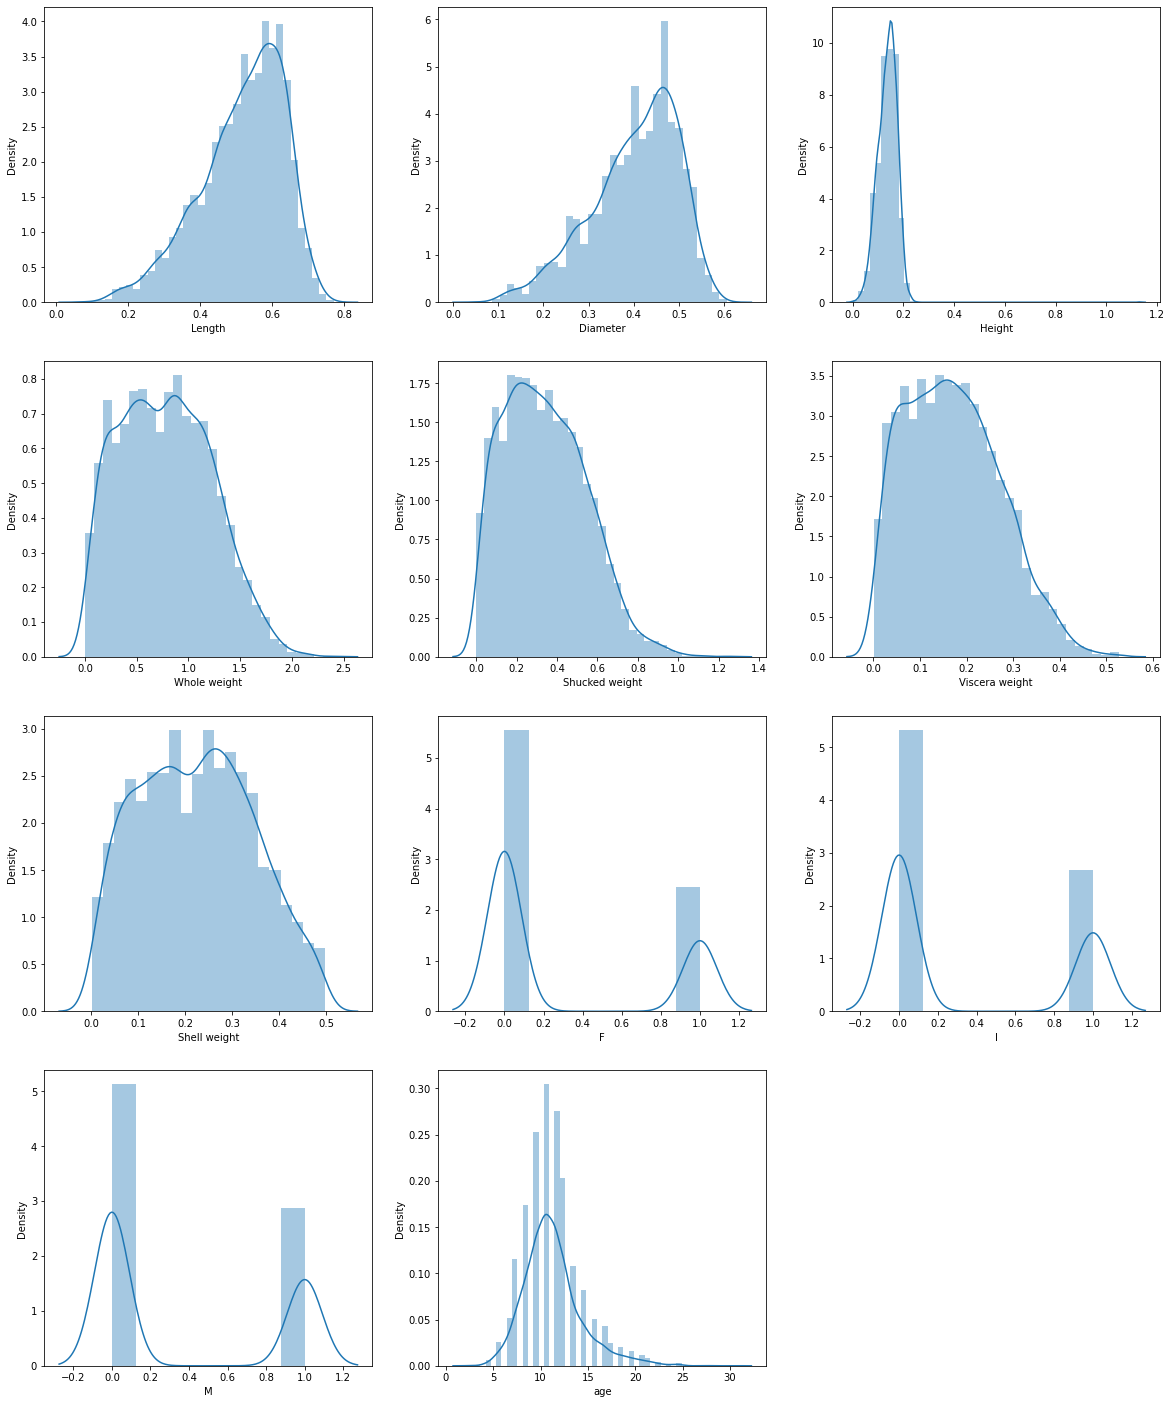

In [495]:
# lets visualize the data distributed in every column after removing skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df_cleaned:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [496]:
y = df['age']
X = df.drop('age', axis = 1)

In [497]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [498]:
# How X_Scaled data looks like
X_scaled

array([[-0.32914444, -0.17052774, -0.99883328, ..., -0.60508053,
        -0.80950095,  1.40538646],
       [-1.29160127, -1.28387277, -1.15382146, ..., -0.60508053,
        -0.80950095,  1.40538646],
       [ 0.35832473,  0.44181203,  0.24107214, ...,  1.65267258,
        -0.80950095, -0.71154805],
       ...,
       [ 0.67914368,  0.77581554,  1.17100121, ...,  1.65267258,
        -0.80950095, -0.71154805],
       [ 0.90830007,  0.66448104,  0.24107214, ..., -0.60508053,
        -0.80950095,  1.40538646],
       [ 1.22911901,  1.1654863 ,  0.70603667, ...,  1.65267258,
        -0.80950095, -0.71154805]])

In [499]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 25)

In [500]:
y_train.head()

2581     7.5
2573     9.5
2478     9.5
793     13.5
3083     5.5
Name: age, dtype: float64

### Model instantiating and training

In [501]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

## Predict the age of abalone

In [502]:
df.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,0,0,1,8.5


In [503]:
print('The age of abalone is :', regression.predict(scalar.transform([[0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,0,0,1]])))

The age of abalone is : [9.15916292]


In [504]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.5064363724725696

In [505]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.5630321723024146

In [506]:
# lets plot and visualize
y_pred = regression.predict(x_test)

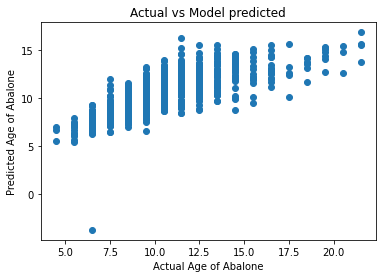

In [507]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Age of Abalone')
plt.ylabel('Predicted Age of Abalone')
plt.title('Actual vs Model predicted')
plt.show()

In [508]:
y_pred = regression.predict(x_test)

In [509]:
mean_absolute_error(y_test,y_pred)

1.3455233768080335

In [510]:
mean_squared_error(y_test,y_pred)

3.3583717211096134

In [511]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.8325860746796079

## Using Regularization method to check whether our regression model is overfitting or not

In [512]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [513]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [514]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

5.1809245026626205e-05

In [515]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=5.1809245026626205e-05)

In [516]:
lasso_reg.score(x_test,y_test)

0.563035051938017

### Using Ridge regression model

In [517]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [518]:
ridgecv.alpha_

0.001

In [519]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [520]:
ridge_model.score(x_test,y_test)

0.5630322714538348

### Model Saving

In [521]:
# saving the model to local system
filename = 'finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))